In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from nltk.corpus import stopwords
import pandas as pd, seaborn as sns, matplotlib as mpl
import sbrt_ibict_ml.sbrt_ibict_ml as sbrt
import matplotlib.pyplot as plt
import numpy as np

In [14]:
dossies = sbrt.get_dossies_df(size=50)
corpus = dossies.text
dossies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    50 non-null     object
 1   text    50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


In [15]:
corpus

0     abnt absorção acesso acidez alimento alumínio ...
1     abate abelha abrasão abs absorção acesso aderê...
2     abnt acesso acidez acondicionamento adega adub...
3     abnt acesso adesivo aeromodelismo aglomerado a...
4     absorção acesso acidez administração agricultu...
5     acesso alarme aparelho apr ar associação aterr...
6     acesso adubo agricultura agroecologia alimenta...
7     abnt acesso acidez aftosa alimento alumínio al...
8     absorção acesso acetona acidez acrílico agluti...
9     abnt acesso agitador alcalino alimentação alum...
10    acesso alemanha alumina alumínio apr armazenam...
11    acerola acesso acidez administração adubação a...
12    abate abatedouro acesso agricultura agroindúst...
13    abnt abrasão acesso acrílico aglomerado agulha...
14    abnt acesso acidez acroleína aditivo agricultu...
15    acesso anatomia aparelho armazenamento balança...
16    abnt abrasão absorção acesso acrílico agulha a...
17    abnt absorção acesso acidez acne acondicio

In [16]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('portuguese'))
X = vectorizer.fit_transform(corpus)
X.shape

(50, 1399)

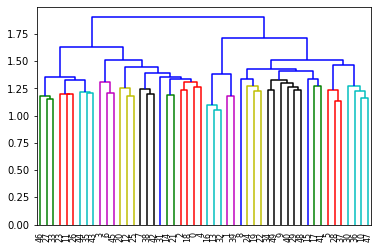

In [19]:
den = dendrogram(linkage(X.toarray(), method='ward'))

In [20]:
dossies.file.loc[[46,27,33]]


46    5709.txt
27     110.txt
33     146.txt
Name: file, dtype: object

In [25]:
metadados = sbrt.get_dossies_metadados_df(dossies.file)

In [26]:
metadados.loc[[46,27,33]]

,titulo,palavras_chave,categoria
46,Plantas forrageiras,"[Ensilagem, feno, forrageira, gramínea forr...","[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Alimentos ..."
27,Cultivo de Algodão,"[Algodão, cultivo, agricultura, plantio, e...","[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Fr..."
33,Cultivo de Cevada,"[Cevada, cultivo, agricultura, cereal, mal...","[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ce..."


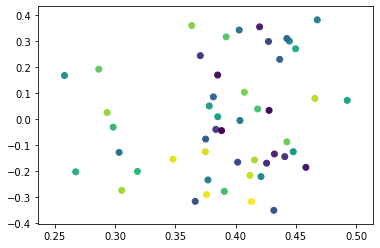

In [33]:
svd = TruncatedSVD()
scatter_plot_points = svd.fit_transform(X.toarray())
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(X.toarray())

xs = [o[0] for o in scatter_plot_points]
ys = [o[1] for o in scatter_plot_points]

plt.scatter(x=xs, y=ys, c=model.labels_)
